In [1]:
import pandas as pd 

Gathered data from the user who created the negative eWOM the 18 january 2012 for Mcdonald (timestamp: all day 12/01/18)

In [2]:
df = pd.read_excel("D:/Users/932151706/Desktop/NegativeWOM_19_01_12.xlsx")

In [3]:
df

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,tweet
0,56545167,2012-01-19 23:49:52+00:00,,1.601470e+17,en,0,0,0,2,RT @catvalente: AHAHAHA. McDonalds! OMG! Your ...
1,386642310,2012-01-19 23:49:28+00:00,,1.601469e+17,en,0,0,0,0,You've heard of #greenwashing but what about #...
2,19610705,2012-01-19 23:44:53+00:00,,1.601457e+17,en,0,0,0,38,RT @McDonalds: Meet Frank. Frank grows the bes...
3,254348632,2012-01-19 23:43:36+00:00,,1.601454e+17,en,0,0,0,6,RT @SlowFoodUSA: Wonder if the local food move...
4,92415382,2012-01-19 23:43:06+00:00,,1.601453e+17,en,0,0,0,0,Words that live on. What's in a McNugget? http...
...,...,...,...,...,...,...,...,...,...,...
2884,341621491,2012-01-18 08:11:17+00:00,,1.595484e+17,en,0,0,0,0,Sometimes I buy weed. I show love still...cuz ...
2885,250972103,2012-01-18 07:03:05+00:00,,1.595312e+17,en,0,0,0,40,RT @McDonalds: He’s what you’d call a “Beef Sn...
2886,234413468,2012-01-18 04:51:39+00:00,,1.594982e+17,en,0,0,0,40,RT @McDonalds: He’s what you’d call a “Beef Sn...
2887,384593538,2012-01-18 03:52:13+00:00,,1.594832e+17,en,0,0,0,40,RT @McDonalds: He’s what you’d call a “Beef Sn...


In [4]:
df['created_at'] = pd.to_datetime(df.created_at, format='%Y-%m-%d %H:%M:%S')

In [5]:
#regroupement des tweets par heures
import numpy as np

groupedlist=[]

#pd.to_datetime(tweets_df1['Datetime'])
#print(type(df2["created_at"]))
#groupedminute=df2.groupby([df2["created_at"].dt.day,
                           #df2["created_at"].dt.hour,
                           #df2["created_at"].dt.minute])
df=df.reset_index(drop=True)
n=len(df)
t0=df['created_at'][n-1]
tab=[[0],[0]]
for i in range (n):
    #print(groupedminute.get_group(key), "\n\n")
    duration=df['created_at'][n-1-i]-t0
    #print(duration)
    duration_in_s = duration.total_seconds()
    minutes = divmod(duration_in_s, 60)[0] 
    
    
    if df['tweet'][n-1-i][0]=='R' and df['tweet'][n-1-i][1]=='T':
        #print(int(minutes), "\n\n")
        #print(df2['tweet'][n-1-i])
        sizetab=len(tab[0])
        if tab[0][sizetab-1]==minutes:
            tab[1][sizetab-1]+=1
        else:
            tab[0].append(int(minutes))
            tab[1].append(1)
        #print(tab)
#import matplotlib.pyplot as plt

#x = tab[0]
#y = tab[1]

#plt.bar(x,y,align='center') # A bar chart
#plt.xlabel('temps/min')
#plt.ylabel('cpt de retweets')
#plt.show()
        


Below is a graph showing the impact of the negativeWOM RT during a 24 time period (120 minutes intervals)

[[0, 120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200, 1320, 1440, 1560, 1680, 1800, 1920, 2040, 2160, 2280, 2400, 2520, 2640], [0, 2, 1, 6, 7, 25, 64, 105, 81, 96, 74, 155, 139, 104, 46, 8, 0, 5, 14, 11, 54, 75, 61]]


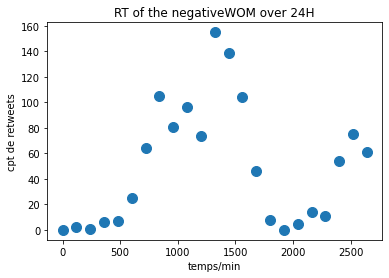

In [6]:
import matplotlib.pyplot as plt
output=[[],[]]
delay=120
tmp=0
n=len(tab[0])
somme=0
for i in range(tab[0][n-1]):
    for j in range(tmp,n):
        if tab[0][j]==i:
            somme+=tab[1][j]
            tmp=j
        elif tab[0][j]>i:
            break
    if i%delay==0:
        output[0].append(i)
        output[1].append(somme)
        somme=0
print(output)

x=output[0]
y=output[1]

plt.xlabel('temps/min')
plt.ylabel('cpt de retweets')
plt.title('RT of the negativeWOM over 24H')


plt.scatter(x, y,s=100)

plt.show() # affiche la figure a l'ecran



        
        

------------------------------------------------------------------------------------------------------------------------------

SST implementation 

Step 1: Tweepy identification

In [7]:
import tweepy
consumer_key = "drRp0TJlwcP1JFHk1Wr4GCyEA"
consumer_secret = "DBydqpWOpG6aveZdyD2xxDq2uIzVxUfJwRAEqxHIlqAB157cHZ"
access_token = "1526192300182978562-lBi3146fi0boyaS8lKQgxQFjUy0nPm"
access_token_secret = "ctGWjLGCtgoR1AWe69iL2lJuO5LCz38GzvvpmoDetSu8W"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

    

Find the user who created the negative eWOM with his ID 

In [8]:
_id = 71026122
user = api.get_user(user_id=_id)

In [9]:
user.screen_name

'McDonalds'

Step 2: Gathering the tweet from 'McDonalds' between (Tao=0 to (t-1))

In [10]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time


os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAJm%2BcgEAAAAA8EWtQQk5ykxmNS0j9ysg2LEQ3fw%3DYzIF53Ysr6nLJGqnBi9xvb21vlI3H1fGjgzK33VgJQnUfaHbiW'

def auth(): 
    return os.getenv('TOKEN')


def create_headers(bearer_token): 
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']#['place_id']
        else:
            geo = " "

        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']
        
        if ('in_reply_to_user_id' in tweet):
            in_reply_to_user_id = tweet['in_reply_to_user_id']
        else:
            in_reply_to_user_id = " "
        
        

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        
        #test
        conversation_id= tweet['conversation_id']
        
      


        # 7. source
        #source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count,conversation_id,in_reply_to_user_id,text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 
    
# append_to_csv(json_response, "data.csv") 
    

#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "from:McDonalds"
start_list=["2009-01-01T00:00:00.000Z"]
end_list=["2012-01-21T00:00:00.000Z"]
lang='en'
max_results = 500



#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open("data.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','conversation_id','in_reply_to_user_id','tweet'])
csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 2000000 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, "data.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, "test.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)
df = pd.read_csv('data.csv')

#print(df) 

-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  1jzu9lk96gu5npvze67zynqogjain6e5uyrjxroqj0cd
Start Date:  2009-01-01T00:00:00.000Z
# of Tweets added from this response:  497
Total # of Tweets added:  497
-------------------
-------------------
Token:  1jzu9lk96gu5npvze67zynqogjain6e5uyrjxroqj0cd
Endpoint Response Code: 200
Next Token:  1jzu9lk96gu5npvze37sz686b0mn41bymx3b60lfb059
Start Date:  2009-01-01T00:00:00.000Z
# of Tweets added from this response:  500
Total # of Tweets added:  997
-------------------
-------------------
Token:  1jzu9lk96gu5npvze37sz686b0mn41bymx3b60lfb059
Endpoint Response Code: 200
Next Token:  7vh6z3esgzqo5btqvx886h60papa4jszamln4c1yt9
Start Date:  2009-01-01T00:00:00.000Z
# of Tweets added from this response:  500
Total # of Tweets added:  1497
-------------------
-------------------
Token:  7vh6z3esgzqo5btqvx886h60papa4jszamln4c1yt9
Endpoint Response Code: 200
Next Token:  7vh6z3esgzqo5btey371yduvohw93ksba477c5ebnh
Start Date:  200

In [10]:
#import pandas as pd
#df=pd.read_csv('data.csv')

In [11]:
df = pd.read_csv("D:/Users/932151706/Desktop/McDonaldCSV.csv")

In [12]:
df

,Unnamed: 0,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,conversation_id,in_reply_to_user_id,tweet
0,0,71026122,2012-01-20 23:31:46,,160504821496029185,en,2,0,2,3,160503733715877888,21457808,@V_EATS_BURGERS aww. Thanks! Lovin' it :)
1,1,71026122,2012-01-20 22:51:33,,160494703018651648,en,6,0,19,43,160459089615396864,9890492,.@peta That posting is absolutely FALSE McNugg...
2,2,71026122,2012-01-20 22:38:28,,160491408740986880,en,2,0,7,20,160491408740986880,,We're getting quite the snow storm here in Chi...
3,3,71026122,2012-01-20 21:57:22,,160481064660369409,en,3,0,30,60,160481064660369409,,Calling all chicken enthusiasts! McD’s newest ...
4,4,71026122,2012-01-20 21:04:25,,160467742741372928,en,0,0,3,4,160466946972856320,451852197,@ArianaCsaez4049 Yep! Our Happy Meals now auto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3444,71026122,2010-08-11 13:29:26,,20885405107,en,0,0,0,0,20822007451,36654398,"@Waxmonkey73 Good one, Mike. ^Geo"
3445,3445,71026122,2010-08-11 13:26:28,,20885201378,en,0,0,0,0,20846829419,16294197,@b_boogey_xl Yes! ^Geo
3446,3446,71026122,2010-08-11 13:26:09,,20885179578,en,0,0,0,0,20847885235,15159590,@ScottDeYager Should be a great meeting. Make ...
3447,3447,71026122,2010-08-11 13:21:56,,20884894454,en,0,0,0,0,20867606934,21172103,@KiddLeow Mayor McCheese would be proud. ^Geo


In [13]:
df['created_at'] = pd.to_datetime(df.created_at).dt.tz_localize(None)

In [14]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [15]:
start_date = '2010-08-10'
end_date = '2012-01-19'

In [16]:
tao = (df['created_at'] > start_date) & (df['created_at'] <= end_date)

In [17]:
df2= df.loc[tao]
df2

,Unnamed: 0,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,conversation_id,in_reply_to_user_id,tweet
17,17,71026122,2012-01-18 22:29:25,,159764357809582081,en,3,0,9,18,159764357809582081,,We're excited to share the quality story behin...
18,18,71026122,2012-01-18 21:06:45,,159743551830376448,en,0,0,0,43,159743551830376448,,RT @Esquiremag: #ThingsWeCanAgreeOn The Egg Mc...
19,19,71026122,2012-01-18 20:30:38,,159734463469850624,en,7,0,20,26,159734463469850624,,Meet some of the hard-working people dedicated...
20,20,71026122,2012-01-18 18:26:08,,159703132945924097,en,2,0,11,9,159703132945924097,,He’s what you’d call a “Beef Snob”. Meet Steve...
21,21,71026122,2012-01-18 18:08:24,,159698671372472321,en,1,0,2,0,159693422767251456,74212293,@bencooper0 We're lovin' it :)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3444,71026122,2010-08-11 13:29:26,,20885405107,en,0,0,0,0,20822007451,36654398,"@Waxmonkey73 Good one, Mike. ^Geo"
3445,3445,71026122,2010-08-11 13:26:28,,20885201378,en,0,0,0,0,20846829419,16294197,@b_boogey_xl Yes! ^Geo
3446,3446,71026122,2010-08-11 13:26:09,,20885179578,en,0,0,0,0,20847885235,15159590,@ScottDeYager Should be a great meeting. Make ...
3447,3447,71026122,2010-08-11 13:21:56,,20884894454,en,0,0,0,0,20867606934,21172103,@KiddLeow Mayor McCheese would be proud. ^Geo


In [18]:
df2 = df2.reset_index(drop=True)
df2['id']

0       159764357809582081
1       159743551830376448
2       159734463469850624
3       159703132945924097
4       159698671372472321
               ...        
3427           20885405107
3428           20885201378
3429           20885179578
3430           20884894454
3431           20816669486
Name: id, Length: 3432, dtype: int64

In [20]:
#df.to_excel("C:/Users/srabh/Desktop/Mcdonald.xlsx")

In [21]:
import pandas as pd
#df2=pd.read_csv("C:/Users/srabh/Documents/Research_internship_ING4/Excel/McdonaldSST(t-1).csv",error_bad_lines=False)

In [22]:
#df2['id'] 

In [23]:
#df2['id']=df2["id"].replace(".","")

In [24]:
#df2['id']

In [25]:
#df2['id']= pd.options.display.float_format = '{:,.0f}'.format

In [26]:
df2['tweet']

0       We're excited to share the quality story behin...
1       RT @Esquiremag: #ThingsWeCanAgreeOn The Egg Mc...
2       Meet some of the hard-working people dedicated...
3       He’s what you’d call a “Beef Snob”. Meet Steve...
4                          @bencooper0 We're lovin' it :)
                              ...                        
3427                    @Waxmonkey73 Good one, Mike. ^Geo
3428                               @b_boogey_xl Yes! ^Geo
3429    @ScottDeYager Should be a great meeting. Make ...
3430        @KiddLeow Mayor McCheese would be proud. ^Geo
3431    @StateOfMariland It's Newman's Own blend for M...
Name: tweet, Length: 3432, dtype: object

In [27]:
#df2['tweet'].tolist()

In [28]:
dfRT=pd.DataFrame(df2)
for i in range (len(dfRT['tweet'])):
    if (not (dfRT['tweet'][i][0]=='R') or not(dfRT['tweet'][i][1]=='T') or not(dfRT['tweet'][i][2]==' ') or not(dfRT['tweet'][i][3]=="@")):
        dfRT.drop(i, axis=0, inplace=True)
        
dfRT = dfRT.reset_index(drop=True)
dfRT

        


,Unnamed: 0,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,conversation_id,in_reply_to_user_id,tweet
0,18,71026122,2012-01-18 21:06:45,,159743551830376448,en,0,0,0,43,159743551830376448,,RT @Esquiremag: #ThingsWeCanAgreeOn The Egg Mc...
1,221,71026122,2011-12-08 19:29:22,,144861144685887488,en,0,0,0,3,144861144685887488,,RT @jen_martinez: Build strategic relationship...
2,222,71026122,2011-12-08 19:24:55,,144860023233855488,en,0,0,0,3,144860023233855488,,RT @LitterFreeEarth: @McDonalds Q6 Sponsor/sup...
3,225,71026122,2011-12-08 19:19:09,,144858570473734144,en,0,0,0,2,144858570473734144,,RT @snapconf: @McDListenTour An impt part of s...
4,230,71026122,2011-12-08 19:04:43,,144854938999197697,en,0,0,0,5,144854938999197697,,RT @sahans: @mcdonalds Windows and skylights t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3265,71026122,2010-09-09 20:05:00,,24039605869,en,0,0,0,4,24039605869,,RT @AboutMcDonalds: Have u dropped off ur chan...
168,3288,71026122,2010-09-07 14:19:29,,23240832544,en,0,0,0,3,23240832544,,RT @jangunter: Good Morning! #RMHCDayofChange ...
169,3307,71026122,2010-09-03 16:50:34,,22903347522,en,0,0,0,1,22903347522,,RT @Biobabe10: Visit bff Its a 8 hr car trip w...
170,3348,71026122,2010-08-30 18:55:12,,22547926597,en,0,0,0,3,22547926597,,RT @Wingoz Another reason to be happy! @McDona...


In [31]:
import tweepy
import time
import pandas as pd
 
# assign the values accordingly
consumer_key = "drRp0TJlwcP1JFHk1Wr4GCyEA"
consumer_secret = "DBydqpWOpG6aveZdyD2xxDq2uIzVxUfJwRAEqxHIlqAB157cHZ"
access_token = "1526192300182978562-lBi3146fi0boyaS8lKQgxQFjUy0nPm"
access_token_secret = "ctGWjLGCtgoR1AWe69iL2lJuO5LCz38GzvvpmoDetSu8W"
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 
# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)
 
# calling the api
api = tweepy.API(auth,wait_on_rate_limit=True)

given_RT=[]


#récupération des given RT 
for i in range(len(dfRT)):
    _id=dfRT['id'][i]
    user = api.get_status(_id)
    if len(user.entities['user_mentions'])!=0:
        
        source_screen_name=(user.entities['user_mentions'][0]['screen_name'])
        
        target_screen_name = "@McDonalds"

        # getting the friendship details
        friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
        print("Is " + friendship[0].screen_name + " following " + friendship[1].screen_name, end = "? : ")
        if friendship[0].following == False:
            print("No")
        else:
            print("Yes")
            given_RT.append(source_screen_name)

given_RT = list(set(given_RT))

    
    
    
    
dfGivenRT = pd.DataFrame(given_RT, columns=['Username'])  

Is Esquiremag following McDonalds? : No
Is jen_martinez following McDonalds? : No
Is LitterFreeEarth following McDonalds? : Yes
Is snapconf following McDonalds? : Yes
Is sahans following McDonalds? : Yes
Is jen_martinez following McDonalds? : No
Is McDonalds following McDonalds? : No
Is LivingSocial following McDonalds? : No
Is LivingSocial following McDonalds? : No
Is si_vault following McDonalds? : No
Is McCafeYourDay following McDonalds? : No


Rate limit reached. Sleeping for: 581


Is MWWGroup following McDonalds? : No
Is McDonalds following McDonalds? : No
Is McCafeYourDay following McDonalds? : No
Is McCafeYourDay following McDonalds? : No
Is plok following McDonalds? : No
Is McCafeYourDay following McDonalds? : No
Is RMHC following McDonalds? : Yes
Is familyfoodie following McDonalds? : No
Is mommaloves following McDonalds? : No
Is DianeSawyer following McDonalds? : No
Is CharlyMc following McDonalds? : No
Is McCafeYourDay following McDonalds? : No
Is EatThisNotThat following McDonalds? : Yes
Is tiffany053p following McDonalds? : Yes
Is achgcs following McDonalds? : No
Is utilitron following McDonalds? : No
Is KingJames following McDonalds? : No
Is themichellewie following McDonalds? : No
Is KKDietitian following McDonalds? : No
Is kikodaclown following McDonalds? : Yes
Is AugustineIdeas following McDonalds? : No
Is LFieldsBooks following McDonalds? : Yes
Is themichellewie following McDonalds? : No
Is KingJames following McDonalds? : No
Is McDonaldsCorp follow

In [32]:
dfGivenRT

,Username
0,sahans
1,jhenegar
2,RogersBase
3,NancyLoo
4,hkjohnson
5,y2jsgal
6,McD_NorthTexas
7,savingsmania
8,CLowetweets
9,LitterFreeEarth


In [ ]:
import tweepy
import time
import pandas as pd
 
# assign the values accordingly
consumer_key = "drRp0TJlwcP1JFHk1Wr4GCyEA"
consumer_secret = "DBydqpWOpG6aveZdyD2xxDq2uIzVxUfJwRAEqxHIlqAB157cHZ"
access_token = "1526192300182978562-lBi3146fi0boyaS8lKQgxQFjUy0nPm"
access_token_secret = "ctGWjLGCtgoR1AWe69iL2lJuO5LCz38GzvvpmoDetSu8W"
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 
# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)
 
# calling the api
api = tweepy.API(auth, wait_on_rate_limit=True)

client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAJm%2BcgEAAAAA8EWtQQk5ykxmNS0j9ysg2LEQ3fw%3DYzIF53Ysr6nLJGqnBi9xvb21vlI3H1fGjgzK33VgJQnUfaHbiW',wait_on_rate_limit=True)

user=[]

id_author= df2['author id'][0]


for tweet in tweepy.Paginator(client.get_liked_tweets,id=int(id_author),expansions=['author_id'],max_results=100):
    users= {u["username"]: u for u in tweet.includes['users']}
    user+=users
    #print(tweet)
    
user = list(set(user))


#tweets= client.get_liked_tweets(id=id_author,expansions='author_id')

#users= {u["id"]: u for u in tweets.includes['users']}

#print(users)

#for tweet in tweets.data:
   
    #print(users[tweet.author_id], '\n')

 # screen name of the account 1
given_likes=[]

for i in user:

    source_screen_name = i


    # screen name of the account 2
    target_screen_name = "@McDonalds"

    # getting the friendship details
    friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
    print("Is " + friendship[0].screen_name + " following " + friendship[1].screen_name, end = "? : ")
    if friendship[0].following == False:
        print("No")
    else:
        print("Yes")
        given_likes.append(i)

dfGivenLikes = pd.DataFrame(given_likes, columns=['Username'])  

Rate limit exceeded. Sleeping for 853 seconds.


In [32]:
dfGivenLikes

NameError: name 'dfGivenLikes' is not defined

-Gathering the users that liked and RT all his tweets from the user (i) and verify if the users in questions follows the Mcdonald's to see if they belong to the community (c)

-Gather all the likes that the user (i) liked tweet

In [23]:
import tweepy
import time
import pandas as pd
 
# assign the values accordingly
consumer_key = "drRp0TJlwcP1JFHk1Wr4GCyEA"
consumer_secret = "DBydqpWOpG6aveZdyD2xxDq2uIzVxUfJwRAEqxHIlqAB157cHZ"
access_token = "1526192300182978562-lBi3146fi0boyaS8lKQgxQFjUy0nPm"
access_token_secret = "ctGWjLGCtgoR1AWe69iL2lJuO5LCz38GzvvpmoDetSu8W"
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 
# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)
 
# calling the api
api = tweepy.API(auth, wait_on_rate_limit=True)

client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAJm%2BcgEAAAAAobDvrEQCoB9DjFHw9ZPzJk5j%2BDk%3DbaZ9pxwn85ljTFagUOYZvyYpTFj63IVshXq3qqlNgIifwEJAr8', wait_on_rate_limit=True)


    
retweets_list=[]
like_list=[]
user_listlike=[]
user_listRT=[]



for i in range(len(df2)):
    #get received retweets
    for user in tweepy.Paginator(client.get_retweeters,id=int(df2['id'][i]), max_results=100).flatten(limit=100): 
        retweets_list.append(user.username)
    #get received likes
    for user in tweepy.Paginator(client.get_liking_users,id=int(df2['id'][i]), max_results=100).flatten(limit=100):
        like_list.append(user.username)

        
    

        

retweets_list = list(set(retweets_list))
like_list=list(set(like_list))

dfRT = pd.DataFrame(retweets_list, columns=['Username'])
dfL= pd.DataFrame(like_list, columns=['Username'])
#df.to_csv('C:/Users/srabh/Desktop/listRTSST.csv')
        
#print(retweets_list)

#capturer les replies
 
# screen name of the account 1
for i in retweets_list:
    
    source_screen_name = i

 
    # screen name of the account 2
    target_screen_name = "@McDonalds"

    # getting the friendship details
    try:
        friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
        print("Is " + friendship[0].screen_name + " following " + friendship[1].screen_name, end = "? : ")
        if friendship[0].following == False:
            print("No")
        else:
            print("Yes")
            user_listRT.append(i)
    except:
        print(i+"n'existe pas")
        
dfuserRT=pd.DataFrame(user_listRT,columns=['Username'])  
dfuserRT.to_csv("D:/Users/932151706/Desktop/receivedRT.csv")

        
        
        
for i in like_list:
    print(i)
    
    source_screen_name = i

 
    # screen name of the account 2
    target_screen_name = "@McDonalds"

    # getting the friendship details
    
    try:
        friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
        print("Is " + friendship[0].screen_name + " following " + friendship[1].screen_name, end = "? : ")
        if friendship[0].following == False:
            print("No")
        else:
            print("Yes")
            user_listlike.append(i)
    except:
        print(i+"n'existe pas")

dfuserlike=pd.DataFrame(user_listlike,columns=['Username'])
dfuserlike.to_csv("D:/Users/932151706/Desktop/receivedLikes.csv")

Rate limit exceeded. Sleeping for 779 seconds.
Rate limit exceeded. Sleeping for 879 seconds.
Rate limit exceeded. Sleeping for 880 seconds.
Rate limit exceeded. Sleeping for 880 seconds.
Rate limit exceeded. Sleeping for 879 seconds.
Rate limit exceeded. Sleeping for 881 seconds.
Rate limit exceeded. Sleeping for 879 seconds.
Rate limit exceeded. Sleeping for 879 seconds.
Rate limit exceeded. Sleeping for 879 seconds.
Rate limit exceeded. Sleeping for 879 seconds.
Rate limit exceeded. Sleeping for 881 seconds.
Rate limit exceeded. Sleeping for 881 seconds.
Rate limit exceeded. Sleeping for 878 seconds.
Rate limit exceeded. Sleeping for 880 seconds.
Rate limit exceeded. Sleeping for 882 seconds.
Rate limit exceeded. Sleeping for 882 seconds.
Rate limit exceeded. Sleeping for 882 seconds.
Rate limit exceeded. Sleeping for 882 seconds.
Rate limit exceeded. Sleeping for 882 seconds.
Rate limit exceeded. Sleeping for 880 seconds.
Rate limit exceeded. Sleeping for 879 seconds.
Rate limit ex

Is MargauxNH following McDonalds? : No
Is ayteekay247 following McDonalds? : Yes
Is TheChewDefense following McDonalds? : No
Is ZisBoomBah following McDonalds? : No
Is ForeverteenMaya following McDonalds? : No
Is MelissaNabozny following McDonalds? : Yes
Is Chuparkoff following McDonalds? : No
Is MogranTweets following McDonalds? : Yes
Is paranoiagurl following McDonalds? : No
Is kenbunny following McDonalds? : Yes
Is your7thletter following McDonalds? : No
Is PatJer following McDonalds? : Yes
Is alialramadhan following McDonalds? : Yes
Is Bieber_Dream_ following McDonalds? : Yes
Is 1chefdiva following McDonalds? : No
Is virgyvirgil following McDonalds? : No
Is dxncngonthemoon following McDonalds? : No
Is BrianLinguini following McDonalds? : No
Is angelnev following McDonalds? : No
Is glockinspieler following McDonalds? : No
Is undocu_scholar following McDonalds? : No
Is Adham_T following McDonalds? : Yes
Is Ciumers following McDonalds? : No
Is MadcowsGhost following McDonalds? : Yes
I

Rate limit reached. Sleeping for: 863


Is butterfly2 following McDonalds? : No
Is amangra_cherry following McDonalds? : No
Is kubbylee following McDonalds? : Yes
Is XOXOxtinacXOXO following McDonalds? : No
Is BiteMyyAss following McDonalds? : Yes
Is sniper257 following McDonalds? : No
Is 121fluffy following McDonalds? : No
Is SorteBeats following McDonalds? : No
Is Yoooitsmiggs__ following McDonalds? : No
Is sarahghadban following McDonalds? : No
Is Lilced88 following McDonalds? : No
Is Eng_KT following McDonalds? : No
Is expertpanelen following McDonalds? : No
Is xAbsmith following McDonalds? : Yes
Is MomItForward following McDonalds? : Yes
Is RadkeAmanda following McDonalds? : No
Is aceetylene following McDonalds? : Yes
Is yap3x following McDonalds? : No
Is mineralrich following McDonalds? : Yes
Is m_pongco following McDonalds? : No
Is MeganLynnLevy following McDonalds? : No
Is florenciagrosse following McDonalds? : Yes
Is dom_mp01 following McDonalds? : No
Is owitsalli following McDonalds? : Yes
Is AstrnauT_StAtuS follow

Rate limit reached. Sleeping for: 862


Is Oneandonlyss67 following McDonalds? : No
Is shoutz8945 following McDonalds? : Yes
Is Blogdramedy following McDonalds? : No
Is _moneymik following McDonalds? : No
Is tbhkathleen following McDonalds? : No
Is matthewrandom following McDonalds? : No
Is URAESES__ following McDonalds? : Yes
Is wei313 following McDonalds? : No
Is kathMYP following McDonalds? : Yes
Is cheskabrindle following McDonalds? : No
Is larrys66diner following McDonalds? : No
Is Its_fellipe following McDonalds? : No
Is Shelliclickedit following McDonalds? : Yes
Is diamondgirl1962 following McDonalds? : Yes
Is katrinamilroy following McDonalds? : No
Is JTramelli following McDonalds? : No
Is diwats following McDonalds? : Yes
Is envisiond8p following McDonalds? : Yes
Is BenBlissed following McDonalds? : No
Is DMCGAUGHEY2011 following McDonalds? : Yes
Is BABLINDSOUZA following McDonalds? : No
Is MVElllias following McDonalds? : Yes
Is ImALegendKiller following McDonalds? : No
Is barbarahulin following McDonalds? : No
Is 

Rate limit reached. Sleeping for: 862


Is JenNorris_ following McDonalds? : Yes
Is RyanOrr13 following McDonalds? : No
Is jonahb81 following McDonalds? : No
Is iAmClarenceHoe following McDonalds? : No
Is McKaySee following McDonalds? : No
Is yk4784 following McDonalds? : No
Is welch8804 following McDonalds? : Yes
Is Shooting_Rebel following McDonalds? : No
Is Lewis_Vuitton_ following McDonalds? : No
Is IlllllllllllllI following McDonalds? : No
Is wordupdude following McDonalds? : No
Is lindsayfarny following McDonalds? : No
Is JoelyPassey following McDonalds? : No
Is uncoolalex following McDonalds? : No
Is KaremTapia following McDonalds? : No
Is ConiFoix following McDonalds? : Yes
Is jakeinside following McDonalds? : No
Is carlaszostaczuk following McDonalds? : No
Is freeances following McDonalds? : No
Is travelinglatina following McDonalds? : Yes
Is R_cadia_ following McDonalds? : Yes
Is Keira_Observer following McDonalds? : No
Is buzoncrime following McDonalds? : No
Is LitterFreeEarth following McDonalds? : Yes
Is Buddyle

Rate limit reached. Sleeping for: 862


Is LobsterMatsuri following McDonalds? : No
Is IreneM5 following McDonalds? : No
Is MarijuanaReport following McDonalds? : No
Is 354Phantom following McDonalds? : Yes
Is jennyleeisme following McDonalds? : Yes
Is selenacted following McDonalds? : No
Is ComiendoenLA following McDonalds? : Yes
Is ekadiaz following McDonalds? : Yes
Is francescocosta following McDonalds? : No
Is AlohaCharisma following McDonalds? : Yes
Is edforever following McDonalds? : No
Is TheRockinX following McDonalds? : No
Is SBellasWays following McDonalds? : Yes
Is thamireslima95 following McDonalds? : No
Is NguyenBruno following McDonalds? : Yes
Is loganmeek following McDonalds? : No
Is perrymacbeth following McDonalds? : Yes
Is NomadWithStyle following McDonalds? : No
Is PyramidFace following McDonalds? : No
Is DitaLuLu following McDonalds? : Yes
Is alexxheller following McDonalds? : No
Is redhead_cher following McDonalds? : Yes
Is UMassDiLo following McDonalds? : No
Is Concandycorn following McDonalds? : No
Is 

Rate limit reached. Sleeping for: 862


Is sloh following McDonalds? : No
Is kdiggitydawg12 following McDonalds? : Yes
Is Nathalia_Cgomes following McDonalds? : Yes
Is TheAudio following McDonalds? : Yes
Is dubstepsmellsa following McDonalds? : Yes
Is AliyaChosen1 following McDonalds? : Yes
Is amomsparadise following McDonalds? : Yes
Is MrArielEspinal following McDonalds? : No
Is fralcas following McDonalds? : No
Is tontontoshio following McDonalds? : No
Is Mr_Levi_Lewis following McDonalds? : No
Is Photog_TW following McDonalds? : Yes
Is Adriennevh following McDonalds? : Yes
Is bieberwhy_ following McDonalds? : No
Is brookskinner following McDonalds? : No
Is illuminatink following McDonalds? : No
Is CharlesColeman3 following McDonalds? : No
Is DrCain22 following McDonalds? : No
Is DarthEma following McDonalds? : No
Is CourtCamDon1988 following McDonalds? : Yes
Is briebxrries following McDonalds? : No
Is juliesaag following McDonalds? : Yes
Is MiriaamBayona following McDonalds? : Yes
Is Brapplesnapple following McDonalds? : 

Rate limit reached. Sleeping for: 861


Is 99Movement_ following McDonalds? : No
Is mcj67 following McDonalds? : No
Is FireDuckFD following McDonalds? : No
Is amykt following McDonalds? : Yes
Is jey_rey following McDonalds? : No
Is hwk79 following McDonalds? : No
Is JustinPhotoNNY following McDonalds? : Yes
Is nicklevine following McDonalds? : No
Is RandomAlaskan following McDonalds? : No
Is PositiveDestruc following McDonalds? : No
Is LisaBMagnuson following McDonalds? : Yes
Is jiemasn following McDonalds? : No
Is _Paaatii following McDonalds? : No
Is TavoCustodio following McDonalds? : Yes
Is KristinCruz following McDonalds? : Yes
Is BlackDevereaux following McDonalds? : No
Is 7cedric7 following McDonalds? : Yes
Is dcbell05 following McDonalds? : No
Is hkjohnson following McDonalds? : Yes
Is D0wJ0nEs following McDonalds? : No
Is TheRonnnn following McDonalds? : Yes
Is dpav95 following McDonalds? : No
Is dngrznephotos following McDonalds? : Yes
Is TwinClouted following McDonalds? : No
Is amotion following McDonalds? : No
Is

Rate limit reached. Sleeping for: 861


Is iluvmylulu following McDonalds? : No
Is rwt316 following McDonalds? : No
Is DIsaac614 following McDonalds? : Yes
Is Total_Turtle following McDonalds? : No
Is CutieCass following McDonalds? : No
Is Steph_DSxo following McDonalds? : Yes
Is skeaveny following McDonalds? : No
Is BaleyTheMachine following McDonalds? : No
Is rawrmonsterrr following McDonalds? : No
Is Zuhippo following McDonalds? : No
Is jelixabetartist following McDonalds? : No
Is wjjunyor following McDonalds? : Yes
Is Dianadivanni following McDonalds? : No
Is ErynReneeM following McDonalds? : No
Is iamsclTeamJonas following McDonalds? : No
Is polarition following McDonalds? : No
Is GaryBFans following McDonalds? : No
Is SmurphDawg following McDonalds? : Yes
Is wreesus following McDonalds? : No
Is SostiR following McDonalds? : Yes
Is LadyShinobi following McDonalds? : No
Is emmamartin1986 following McDonalds? : No
Is McDonaldsNW following McDonalds? : Yes
Is jackccrawford following McDonalds? : No
Is smigel_ros following 

Rate limit reached. Sleeping for: 861


Is roflDANIEL following McDonalds? : No
Is LuisCortezXD following McDonalds? : No
Is DrewEveryday following McDonalds? : No
Is YonceBernie following McDonalds? : No
Is MyLifeAsLouis following McDonalds? : No
Is edd22uk following McDonalds? : No
Is AVEUnion following McDonalds? : No
Is ts_neumann following McDonalds? : No
Is itsmutz following McDonalds? : No
Is DrizzzyDree following McDonalds? : No
Is PepperPavon following McDonalds? : No
Is Dalmarlz following McDonalds? : No
Is janetot_ following McDonalds? : No
Is rudykins following McDonalds? : No
Is julitravaglini following McDonalds? : No
Is BaddAss_Indian following McDonalds? : No
Is kenneth_suh following McDonalds? : No
Is missjujubee24 following McDonalds? : No
Is Dripnot following McDonalds? : Yes
Is AmyBEBOSTUNNAH_ following McDonalds? : No
Is Mobalis following McDonalds? : No
Is egerstea following McDonalds? : Yes
Is Kream_me following McDonalds? : No
Is voiceyourminds following McDonalds? : No
Is isabelmbianchi following McD

Rate limit reached. Sleeping for: 862


Is teeEMaych following McDonalds? : No
Is yothisisdre following McDonalds? : Yes
Is AtItAgainn following McDonalds? : Yes
Is shoegalnycblog following McDonalds? : No
Is superjennifer following McDonalds? : Yes
Is Cha_Francisco following McDonalds? : No
Is cnikodem following McDonalds? : Yes
Is SovaaBird following McDonalds? : No
Is wilba2 following McDonalds? : Yes
Is TomyKMonster following McDonalds? : No
Is afineday following McDonalds? : No
Is bananas4pies following McDonalds? : Yes
Is MedPedHC following McDonalds? : Yes
Is Cali_Recruiter following McDonalds? : Yes
Is Missarielbanks following McDonalds? : No
Is cecydelagarza following McDonalds? : No
Is renzodonque following McDonalds? : No
Is Scientifically_ following McDonalds? : No
Is m4ttb4rden following McDonalds? : No
Is ellencochrane following McDonalds? : No
Is ahatten0414 following McDonalds? : No
Is Junior_RS47 following McDonalds? : Yes
Is VillageOnMainNS following McDonalds? : Yes
Is FitMomthruBB following McDonalds? : N

Rate limit reached. Sleeping for: 863


Is Univers47 following McDonalds? : No
Is Ortizsyndicate following McDonalds? : Yes
Is LakenisLegit following McDonalds? : No
Is plasticispoison following McDonalds? : Yes
Is mayarasilverio following McDonalds? : No
Is foreveryoungmcd following McDonalds? : Yes
Is wag1myson following McDonalds? : No
Is KatieCan86 following McDonalds? : Yes
Is g_rafael following McDonalds? : Yes
Is FCwelovebiebs following McDonalds? : Yes
Is Patrick1Rodgers following McDonalds? : Yes
Is eviljohnjohn following McDonalds? : No
Is wins4me following McDonalds? : Yes
Is GermanGLD following McDonalds? : No
Is DyahHakim following McDonalds? : Yes
Is KandiiRedhead following McDonalds? : Yes
Is young_sauce19 following McDonalds? : No
Is Esmelarda0 following McDonalds? : Yes
Is bwood345 following McDonalds? : No
Is Lulu_Martinez following McDonalds? : No
Is MashaFilatova following McDonalds? : No
Is padawanryan following McDonalds? : Yes
Is calhyia following McDonalds? : Yes
Is biqmoneyquan13 following McDonalds?

Rate limit reached. Sleeping for: 862


Is etsyb following McDonalds? : No
Is wandadh following McDonalds? : Yes
Is natzai following McDonalds? : No
Is _donnashelton following McDonalds? : No
Is mebelindsay following McDonalds? : Yes
Is Khelliton following McDonalds? : Yes
Is TheBATster following McDonalds? : Yes
Is ItsYakin following McDonalds? : No
Is Zephyr_RR following McDonalds? : Yes
Is freddrikkss following McDonalds? : Yes
Is morbidpete following McDonalds? : No
Is lauangelick following McDonalds? : Yes
Is ceelearn following McDonalds? : Yes
Is I_AM_CHRISSYP following McDonalds? : Yes
Is BitensMusic following McDonalds? : No
Is d20Dad following McDonalds? : Yes
Is hersheysxbliss following McDonalds? : No
Is hezable2 following McDonalds? : No
Is BayouBun following McDonalds? : No
Is Dj4751 following McDonalds? : No
Is rapuls101 following McDonalds? : No
Is marclene following McDonalds? : No
Is naimbob following McDonalds? : No
Is CashCarter_WTF following McDonalds? : No
Is Patty0616 following McDonalds? : No
Is Lissa3

Rate limit reached. Sleeping for: 863


Is shanbox74 following McDonalds? : No
Is wawawomp following McDonalds? : Yes
Is juleehh_Beadles following McDonalds? : Yes
Is ambiooneoficial following McDonalds? : Yes
Is DayanaCarriillo following McDonalds? : No
Is leekingjr following McDonalds? : No
Is luvthacanes following McDonalds? : Yes
Is MrAppliance following McDonalds? : No
Is drey_styles following McDonalds? : No
Is MegRoseWilliams following McDonalds? : No
Is category_jl following McDonalds? : No
Is MsRomes following McDonalds? : Yes
Is KuntaRunnin following McDonalds? : No
Is QueenAlice777 following McDonalds? : No
Is NicLott following McDonalds? : No
Is stherweasley following McDonalds? : No
Is chell_belll following McDonalds? : No
Is DealSlayers following McDonalds? : Yes
Is soundboyacoy following McDonalds? : Yes
Is DidiM337 following McDonalds? : Yes
Is HIGHambitionss following McDonalds? : No
Is worldnewsbrasil following McDonalds? : Yes
Is MattAdkin following McDonalds? : No
Is YorozuyaVapor following McDonalds? : N

Rate limit reached. Sleeping for: 863


Is ShutUpNate following McDonalds? : No
Is BethRosen following McDonalds? : Yes
Is S0mto following McDonalds? : No
Is malibu_x_barbi following McDonalds? : No
Is jafari following McDonalds? : No
Is ttmichelle21 following McDonalds? : No
Is seasull following McDonalds? : Yes
Is dsetyanugraha93 following McDonalds? : No
Is meganJrussell following McDonalds? : Yes
Is neonguru following McDonalds? : No
Is Danniel_Bennett following McDonalds? : No
Is coasterfreak09 following McDonalds? : Yes
Is Buckeye4NC following McDonalds? : Yes
Is tannawings following McDonalds? : Yes
Is jstjohn83 following McDonalds? : Yes
Is ohitsyuka following McDonalds? : No
Is KeriCane following McDonalds? : Yes
Is the_music_gal following McDonalds? : Yes
Is morgleigh following McDonalds? : Yes
Is vimitta following McDonalds? : No
Is McD_CharmCity following McDonalds? : Yes
Is dreamin2win following McDonalds? : Yes
Is RhondaMcFaul following McDonalds? : No
Is MissKenyaUSA following McDonalds? : No
Is YeloMagazine f

Rate limit reached. Sleeping for: 862


Is MMOmichael following McDonalds? : Yes
Is greaserdan following McDonalds? : No
Is sarahlolamae following McDonalds? : No
Is NanQuilantan following McDonalds? : No
Is z_pitti following McDonalds? : No
Is 4dRiAn0 following McDonalds? : Yes
Is more2neika following McDonalds? : Yes
Is omona following McDonalds? : No
Is FlickFM following McDonalds? : Yes
Is TripleSober following McDonalds? : No
Is Mom_BeautyFood following McDonalds? : Yes
Is iTzHardX following McDonalds? : No
Is Rell_Ruger following McDonalds? : No
Is rgordon31_55 following McDonalds? : Yes
Is indybaby57 following McDonalds? : Yes
Is tilleysthreads following McDonalds? : Yes
Is rolandsmartin following McDonalds? : No
Is AmandaJWilk following McDonalds? : Yes
Is putridsock following McDonalds? : No
Is sourcewilliam following McDonalds? : No
Is vickycardozo1 following McDonalds? : Yes
Is DeadbeatDagga following McDonalds? : No
Is jaycdrew following McDonalds? : Yes
Is WildOrchids09 following McDonalds? : Yes
Is HR_magazine 

Rate limit reached. Sleeping for: 863


Is KellyOlexa following McDonalds? : Yes
Is jasminealeja following McDonalds? : No
Is AleLogIMDb following McDonalds? : No
Is ayemarr following McDonalds? : No
Is Aerikelo following McDonalds? : No
Is borgwirth following McDonalds? : No
Is Benjamxn_gore following McDonalds? : No
Is JohnMendes69 following McDonalds? : No
Is 006TOE following McDonalds? : No
Is recondo_flavia following McDonalds? : No
Is boz__mccuttie following McDonalds? : No
Is headyorchtheme following McDonalds? : No
Is emilychristiine following McDonalds? : No
Is ateliermatangi following McDonalds? : No
Is CommAuditions following McDonalds? : Yes
Is mehulkar following McDonalds? : No
Is DrewBaltimoree following McDonalds? : No
Is Juskivel following McDonalds? : No
Is YoshikoEnt following McDonalds? : No
Is deanrl following McDonalds? : No
Is SuperstarDJROS following McDonalds? : No
Is Carin_MS following McDonalds? : Yes
Is Gabsperam following McDonalds? : No
Is serialshopperz following McDonalds? : No
Is BrandOneCultu

Rate limit reached. Sleeping for: 863


Is yoquieropizza following McDonalds? : Yes
Is _meeseekss following McDonalds? : No
Is glenn_gould following McDonalds? : No
Is nuttyskadork following McDonalds? : No
Is epribytkova following McDonalds? : No
Is CCEDRITOS following McDonalds? : No
Is laetipro following McDonalds? : No
Is djSANDRAdee following McDonalds? : Yes
Is AndresCufino_ following McDonalds? : Yes
Is joyful_27103 following McDonalds? : Yes
Is sbancelll following McDonalds? : No
Is 1jujubeatz following McDonalds? : No
Is DjTattooo_ following McDonalds? : No
Is ScoopADay following McDonalds? : Yes
Is mjsmith0523 following McDonalds? : Yes
Is Stillsy5 following McDonalds? : No
Is JoyTheFranklin following McDonalds? : Yes
Is chimakks following McDonalds? : No
Is frutiyas following McDonalds? : Yes
Is amacastro29 following McDonalds? : No
Is COMEUPQUEEN following McDonalds? : No
Is KatelynFantin following McDonalds? : Yes
Is literallywhyami following McDonalds? : No
Is AllstarDisney following McDonalds? : No
Is Jacquiwa

Rate limit reached. Sleeping for: 862


Is Colley1962 following McDonalds? : No
Is txcotton following McDonalds? : Yes
Is kirkhaworth following McDonalds? : Yes
Is LyricallyYours following McDonalds? : No
Is JustAnotherTori following McDonalds? : No
Is biancalg following McDonalds? : Yes
Is Jazminemonei following McDonalds? : No
Is Tauseef31 following McDonalds? : No
Is lindsay_hickey following McDonalds? : No
Is StephHorvath following McDonalds? : No
Is cryptomnesiac following McDonalds? : No
Is UgliestKidEver following McDonalds? : No
Is iLuvCodyS following McDonalds? : Yes
Is IrishXCI following McDonalds? : No
Is _iMotorBoat following McDonalds? : No
Is Brotha_Hagi following McDonalds? : No
Is BRAYDENEVANS following McDonalds? : No
Is davidrecados following McDonalds? : No
Is ThaRealBGreen following McDonalds? : No
Is JGfan24ever following McDonalds? : Yes
Is TechnocietyIXIX following McDonalds? : Yes
Is coolgothsweater following McDonalds? : No
Is pelletposy following McDonalds? : Yes
Is top_trend_world following McDonal

Rate limit reached. Sleeping for: 862


Is takeitfrommom following McDonalds? : Yes
Is SS_Dal following McDonalds? : Yes
Is thejacqu following McDonalds? : Yes
Is Roblg_ following McDonalds? : No
Is Sam_On_Rye following McDonalds? : No
Is skier_meme following McDonalds? : Yes
Is PeterRomeo following McDonalds? : Yes
Is bellajeanette following McDonalds? : No
Is Olympos1322 following McDonalds? : Yes
Is M3theMachine following McDonalds? : No
Is anglicus following McDonalds? : No
Is Malaika_Akram following McDonalds? : Yes
Is Reachout_mcd following McDonalds? : Yes
Is MinMemelaXO following McDonalds? : Yes
Is _lucymyers following McDonalds? : No
Is _igotthejuicee_ following McDonalds? : No
Is Kal1one following McDonalds? : Yes
Is RickyRayyy following McDonalds? : No
Is mgonzales0610 following McDonalds? : Yes
Is marmitoSmom following McDonalds? : Yes
Is ChrisLuft25 following McDonalds? : Yes
Is MEDIATOOLStv following McDonalds? : No
Is shaiju following McDonalds? : No
Is AndreevskaBe following McDonalds? : No
Is geozitos follo

Rate limit reached. Sleeping for: 862


Is lofizera following McDonalds? : No
Is PowellJohnT following McDonalds? : Yes
Is Creggy757 following McDonalds? : Yes
Is ingforero following McDonalds? : Yes
Is GemmaSmc_ following McDonalds? : Yes
Is JesseCale following McDonalds? : No
Is JonathanMcCall following McDonalds? : Yes
Is BonniieJeann following McDonalds? : No
Is purwiggy following McDonalds? : No
Is imixed following McDonalds? : No
Is kaylafrenyea following McDonalds? : Yes
Is Paulmc123Paul following McDonalds? : Yes
Is mspringerwftv following McDonalds? : No
Is _kennedyStark following McDonalds? : No
Is yoshii_1301 following McDonalds? : No
Is Ariana_Bossy following McDonalds? : No
Is iamDeeX2 following McDonalds? : No
Is maggiemae0192 following McDonalds? : Yes
Is StarzRBlind following McDonalds? : No
Is aannmc following McDonalds? : No
Is JeremyPond following McDonalds? : No
Is Djahani following McDonalds? : No
Is andrewnelsoncar following McDonalds? : No
Is B1495G following McDonalds? : Yes
Is TTE_Food following McDo

Rate limit reached. Sleeping for: 862


Is AngelzPerry following McDonalds? : No
Is AshleyRae5 following McDonalds? : Yes
Is vyxvxii following McDonalds? : No
Is sarangzeshi following McDonalds? : No
Is teratamusic following McDonalds? : Yes
Is SEANcharlord following McDonalds? : Yes
Is wldflowur13 following McDonalds? : Yes
Is McJoce following McDonalds? : Yes
Is Bilalgroupie following McDonalds? : No
Is BormannJr following McDonalds? : No
Is AngelBeezie following McDonalds? : No
Is REMGS following McDonalds? : Yes
Is Danny_Howells following McDonalds? : No
Is EthanJohnSand following McDonalds? : Yes
Is Shayefly following McDonalds? : Yes
Is ShanikquaShanay following McDonalds? : No
Is Mrs_Van_Eerden following McDonalds? : Yes
Is itsguses following McDonalds? : No
Is youngdeadinside following McDonalds? : No
Is AlexandraGCr following McDonalds? : No
Is carrbot following McDonalds? : No
Is signonthe1 following McDonalds? : Yes
Is paolamrz following McDonalds? : Yes
Is biebsflywithme_ following McDonalds? : Yes
Is laemory fol

Rate limit reached. Sleeping for: 863


Is BridgetteLA following McDonalds? : Yes
Is TSSKevin following McDonalds? : No
Is LegitGreenApple following McDonalds? : No
Is MarleexSaint following McDonalds? : No
Is carlos_1her following McDonalds? : No
Is Ale_3_A following McDonalds? : No
Is SA_Jessica07 following McDonalds? : No
Is InesCamero following McDonalds? : Yes
Is homerbankforts following McDonalds? : No
Is Aguus_Gaarrido following McDonalds? : No
Is Hamsmuggla following McDonalds? : No
Is sgtsaughter following McDonalds? : No
Is joephillipe following McDonalds? : Yes
Is TripleTzz following McDonalds? : No
Is SoCalCoupons following McDonalds? : Yes
Is nutzareus following McDonalds? : Yes
Is pjpettay following McDonalds? : No
Is rafcard following McDonalds? : No
Is gabespears following McDonalds? : Yes
Is therealiso following McDonalds? : No
Is TheBreckening following McDonalds? : No
Is aljimmix following McDonalds? : No
Is grenadein following McDonalds? : No
Is simplydab following McDonalds? : Yes
Is DaGlobalCitizen foll

Rate limit reached. Sleeping for: 862


Is Stimulus4U following McDonalds? : No
Is papad48 following McDonalds? : Yes
Is RealJoyPhelbin following McDonalds? : Yes
Is Kess2000 following McDonalds? : No
Is mtkilpa following McDonalds? : No
Is Twario14 following McDonalds? : No
Is Tony12345x following McDonalds? : No
Is mmucam following McDonalds? : No
Is teamsiems following McDonalds? : No
Is jenjenjenlong following McDonalds? : Yes
Is ThirdProject following McDonalds? : No
Is TheBlueRangerr following McDonalds? : Yes
Is D10SnosAyude following McDonalds? : Yes
Is Vanellie following McDonalds? : Yes
Is countertoplady following McDonalds? : No
Is Emberwize following McDonalds? : Yes
Is 49ersnation following McDonalds? : Yes
Is valsteele101 following McDonalds? : No
Is DuhRebel following McDonalds? : No
Is VickiHanneman following McDonalds? : Yes
Is Airethilien following McDonalds? : No
Is sesynurse following McDonalds? : Yes
Is AScarborough05 following McDonalds? : No
Is beblogalicious following McDonalds? : Yes
Is TikiTrevor fo

Rate limit reached. Sleeping for: 864


Is Britkit9 following McDonalds? : Yes
Is octopus_76 following McDonalds? : Yes
Is ThreeShamrocks following McDonalds? : Yes
Is GeorgiaSamphire following McDonalds? : No
Is Spotlight921 following McDonalds? : Yes
Is IMRELLYP following McDonalds? : No
Is keltom2 following McDonalds? : Yes
Is chronixcrush following McDonalds? : No
Is Jeskido_V following McDonalds? : No
Is KathW80 following McDonalds? : No
Is dancesontrains following McDonalds? : No
Is xcarlyrogers following McDonalds? : No
Is ALakerfan78 following McDonalds? : No
Is davidlafriniere following McDonalds? : Yes
Is _xslbx_ following McDonalds? : No
Is clubber_83 following McDonalds? : Yes
Is Marcopolo0317 following McDonalds? : Yes
Is chinesewifi following McDonalds? : No
Is TheGaleBeggy following McDonalds? : Yes
Is Stocking_Bot_ following McDonalds? : No
Is torrellmorton following McDonalds? : No
Is _ChicagoEDBHome following McDonalds? : Yes
Is lifeasdaddy following McDonalds? : No
Is davidhenkes following McDonalds? : Yes

Rate limit reached. Sleeping for: 862


Is TooMuchNiki following McDonalds? : Yes
Is JWB519 following McDonalds? : No
Is IamEatonWright following McDonalds? : No
Is _linton following McDonalds? : Yes
Is ImKarly following McDonalds? : No
Is bradnewsbear following McDonalds? : No
Is SashaLG following McDonalds? : No
Is Rubikzzzz following McDonalds? : No
Is lindydnil following McDonalds? : Yes
Is HelloItsGio following McDonalds? : No
Is cwliner following McDonalds? : No
Is turkeyboy808 following McDonalds? : Yes
Is Maya_Adachi following McDonalds? : Yes
Is martaliro following McDonalds? : No
Is voguewithariana following McDonalds? : No
Is rodrigopuente following McDonalds? : Yes
Is DangerousMind00 following McDonalds? : No
Is cunxt following McDonalds? : No
Is shannykx following McDonalds? : No
Is bobacola following McDonalds? : Yes
Is LilNigga_Quan following McDonalds? : No
Is therealsarahubb following McDonalds? : Yes
Is NMEACS following McDonalds? : Yes
Is agustinaa98_ following McDonalds? : Yes
Is RPierce05 following McDon

Rate limit reached. Sleeping for: 862


Is MikeJagger_ following McDonalds? : No
Is HollyWPS following McDonalds? : Yes
Is shanda1218 following McDonalds? : No
Is iBieberGum_ following McDonalds? : Yes
Is RichieMontez following McDonalds? : No
Is NWDCScoop following McDonalds? : Yes
Is mrpipes70 following McDonalds? : Yes
Is steahque4u following McDonalds? : Yes
Is marionolea following McDonalds? : Yes
Is IMtruuCOKE following McDonalds? : No
Is farahabushwesha following McDonalds? : No
Is JustVidelle following McDonalds? : No
Is RPheonix following McDonalds? : Yes
Is TweetPceLve_64 following McDonalds? : No
Is roger_1raven following McDonalds? : No
Is AVoiceofAg following McDonalds? : No
Is Divorc3 following McDonalds? : No
Is jackeelantern following McDonalds? : No
Is DollaRoyale following McDonalds? : No
Is wssportscomplex following McDonalds? : Yes
Is iDanniels following McDonalds? : No
Is Misses_Parker following McDonalds? : No
Is Charge112 following McDonalds? : No
Is PEspaillat following McDonalds? : Yes
Is Lightning81

Rate limit reached. Sleeping for: 862


Is headstate following McDonalds? : No
Is mohdbash following McDonalds? : No
Is drdwayneproctor following McDonalds? : No
Is FeistyHeavy following McDonalds? : Yes
Is kaaat following McDonalds? : No
Is McD_Savannah following McDonalds? : Yes
Is Be_gentl3 following McDonalds? : No
Is slacks_stacks following McDonalds? : No
Is BridgeKhalifa following McDonalds? : No
Is jadasnodgrass77 following McDonalds? : Yes
Is BobbyGiesken following McDonalds? : Yes
Is lindseynhess following McDonalds? : No
Is copsRphatNgay following McDonalds? : Yes
Is android_hb following McDonalds? : No
Is CamyBelieber1 following McDonalds? : Yes
Is joelotocki following McDonalds? : No
Is jamesmbishop following McDonalds? : No
Is kbonhomme1 following McDonalds? : No
Is tiffanyinmtl following McDonalds? : No
Is PirateSlytherin following McDonalds? : No
Is vvhorechata following McDonalds? : No
Is davek0m following McDonalds? : Yes
Is IIPII following McDonalds? : Yes
Is joseluiszz following McDonalds? : Yes
Is Keviin

Rate limit reached. Sleeping for: 863


Is BigOrangeZone following McDonalds? : No
Is cathalazzo following McDonalds? : No
Is lizicle following McDonalds? : Yes
Is carlosoviedo following McDonalds? : No
Is MDK456 following McDonalds? : Yes
Is PigpenWPI following McDonalds? : Yes
Is Ehiguy101 following McDonalds? : Yes
Is rebeccalcousins following McDonalds? : Yes
Is SPONGIE_KARA following McDonalds? : Yes
Is DNTarn following McDonalds? : No
Is jmeemee following McDonalds? : No
Is bondageltd following McDonalds? : No
Is RUBEN_PUNISHER following McDonalds? : No
Is noahgraham following McDonalds? : Yes
Is therealpostie following McDonalds? : No
Is Lissiaah following McDonalds? : Yes
Is HermanThomJr following McDonalds? : No
Is CCogill following McDonalds? : Yes
Is M0ZTD0P3 following McDonalds? : Yes
Is hisnamechuck following McDonalds? : No
Is bugliker following McDonalds? : No
Is CjNikoBran following McDonalds? : No
Is TheKiwanian following McDonalds? : No
Is coimbrajones following McDonalds? : No
Is darklanedem0 following McD

Rate limit reached. Sleeping for: 863


Is DiversityWoman following McDonalds? : Yes
Is peterCroser following McDonalds? : No
Is natalie4health following McDonalds? : No
Is Princess_SaraK5 following McDonalds? : Yes
Is thriftybeauty following McDonalds? : No
Is KGdaArtist following McDonalds? : No
Is Rhammified following McDonalds? : Yes
Is reazonozaer following McDonalds? : No
Is bevinkoddy following McDonalds? : No
Is DLBowers63 following McDonalds? : No
Is Kerfuffle25 following McDonalds? : Yes
Is gabi_krontal following McDonalds? : Yes
Is StarrInd following McDonalds? : Yes
Is Schoollover following McDonalds? : No
Is bypaz93 following McDonalds? : No
Is daryl_rosado following McDonalds? : Yes
Is DanielGlyn following McDonalds? : No
Is Luccchesi following McDonalds? : No
Is Maxspida following McDonalds? : No
Is EijaSignature following McDonalds? : No
Is LorenzInBenzo following McDonalds? : No
Is STEVEK04 following McDonalds? : No
Is valady1 following McDonalds? : No
Is n0elmarie following McDonalds? : No
Is CleanerUSA fol

Rate limit reached. Sleeping for: 862


Is MasterCardBrian following McDonalds? : No
Is _ItsMeShana following McDonalds? : No
Is dunkingdad following McDonalds? : No
Is Surachai_3D following McDonalds? : No
Is mariavale4 following McDonalds? : No
Is saambell following McDonalds? : No
Is KarlaUrias following McDonalds? : No
Is reyner following McDonalds? : No
Is ThemanToknow88 following McDonalds? : No
Is SunnyinAlaska following McDonalds? : Yes
Is tropicalchula following McDonalds? : Yes
Is jdilladaddy3 following McDonalds? : No
Is Hi_Im_Euge following McDonalds? : No
Is SLThrun3 following McDonalds? : Yes
Is viteez following McDonalds? : No
Is BellaMuller following McDonalds? : No
Is bqob01 following McDonalds? : No
Is DannyKidRadio following McDonalds? : No
Is Mo3athooo following McDonalds? : No
Is h1tman34 following McDonalds? : No
Is LukisYT following McDonalds? : No
Is VictorQuest following McDonalds? : No
Is Arly_IBelieve following McDonalds? : No
Is HariJaja_Barbie following McDonalds? : No
Is hminnesota following McD

Rate limit reached. Sleeping for: 862


Is nerdynattyg following McDonalds? : No
Is thestraggler following McDonalds? : No
Is JPaddywhack following McDonalds? : No
Is gdueiaopdbzbahj following McDonalds? : No
Is off2ibiza following McDonalds? : No
Is laursayles following McDonalds? : No
Is AmandaJoyD following McDonalds? : Yes
Is RascallFlatts following McDonalds? : Yes
Is suntraa following McDonalds? : Yes
Is gaptoothgirl following McDonalds? : Yes
Is auuudriana following McDonalds? : Yes
Is Kobyh following McDonalds? : Yes
Is GabyBakmeijer following McDonalds? : No
Is GigSpecialSF following McDonalds? : No
Is MsPretty_Krys following McDonalds? : No
Is jenwoo143 following McDonalds? : Yes
Is OpendoorisFF following McDonalds? : Yes
Is fristaarin following McDonalds? : No
Is sport_2020jp following McDonalds? : Yes
Is nadya_annette following McDonalds? : No
Is tpjalnm7751 following McDonalds? : No
Is remingtontonar following McDonalds? : Yes
Is pauldevro following McDonalds? : No
Is plrodriguez following McDonalds? : Yes
Is zs

Rate limit reached. Sleeping for: 863


Is Momma2qtpies following McDonalds? : No
Is iaruf following McDonalds? : No
Is DaneikaShenay following McDonalds? : No
Is luis_hipolito following McDonalds? : No
Is BookofJahJah following McDonalds? : Yes
Is FunProducer following McDonalds? : No
Is Julipri following McDonalds? : Yes
Is MissMeghanBabe following McDonalds? : No
Is McGowanPorterP following McDonalds? : Yes
Is eugenejwlee following McDonalds? : No
Is montCAPboii1 following McDonalds? : Yes
Is Stuartbonner1 following McDonalds? : No
Is jeremyhinton following McDonalds? : Yes
Is jmornhinweg following McDonalds? : Yes
Is DykesWithKites following McDonalds? : No
Is ninkahoogland following McDonalds? : Yes
Is dreamn34 following McDonalds? : Yes
Is calmyourtitss following McDonalds? : Yes
Is titsgerald following McDonalds? : Yes
Is JTFlemingJr following McDonalds? : No
Is lpnd following McDonalds? : Yes
Is ameto following McDonalds? : No
Is karenerren following McDonalds? : Yes
Is AngRicklefs following McDonalds? : No
Is tonysc

Rate limit reached. Sleeping for: 862


Is p_wdisco following McDonalds? : No
Is McHappiDelivery following McDonalds? : Yes
Is carriekirby following McDonalds? : Yes
Is divadesai following McDonalds? : Yes
Is SOCIALITENYC following McDonalds? : Yes
Is rjjones24 following McDonalds? : Yes
Is CarrieGoodman following McDonalds? : Yes
Is philklinedinst following McDonalds? : No
Is Ascronaut__Love following McDonalds? : No
Is daabcreative following McDonalds? : No
Is Wiccad_Mitch following McDonalds? : No
Is nutmeg237 following McDonalds? : Yes
Is NectidaThree7 following McDonalds? : No
Is Wandering_Juan following McDonalds? : No
Is gracieandersen following McDonalds? : Yes
Is Jacobsmarjesse following McDonalds? : No
Is coasterswim following McDonalds? : Yes
Is KyleAllwine following McDonalds? : No
Is nikhiltait following McDonalds? : No
Is McD_PalmBeach following McDonalds? : Yes
Is ItzMzBunny following McDonalds? : Yes
Is C_Brisc following McDonalds? : No
Is napsrmyantidrug following McDonalds? : Yes
Is sassyme_xoxo following M

Rate limit reached. Sleeping for: 862


Is alisoncrotts following McDonalds? : No
Is SocialGraze following McDonalds? : Yes
Is DrSDMobleyJr following McDonalds? : No
Is Christieland following McDonalds? : No
Is shampayne216 following McDonalds? : No
Is Tariq_NPH following McDonalds? : No
Is theden82 following McDonalds? : No
Is beaglelover1000 following McDonalds? : No
Is Huntybear2 following McDonalds? : No
Is katherinalvarez following McDonalds? : No
Is cameranhand following McDonalds? : Yes
Is mellyb6 following McDonalds? : No
Is NHL following McDonalds? : No
Is Spindeezy following McDonalds? : Yes
Is audmccue following McDonalds? : No
Is knarf567 following McDonalds? : No
Is acoolac following McDonalds? : Yes
Is ConnieFoggles following McDonalds? : Yes
Is LoomingDarkness following McDonalds? : No
Is DatBeadlesChiq following McDonalds? : Yes
Is Kidsia following McDonalds? : Yes
Is KaitAnnRuthRich following McDonalds? : No
Is CloudedTear816 following McDonalds? : Yes
Is mickers79 following McDonalds? : No
Is manganlol foll

Rate limit reached. Sleeping for: 862


Is ShellyShellzs following McDonalds? : Yes
Is notforgottenrap following McDonalds? : No
Is dolleyedcat following McDonalds? : No
Is ilovencoughlin following McDonalds? : No
Is 3rachapiola following McDonalds? : No
Is IOtakuuu following McDonalds? : No
Is Iam_sweetJane following McDonalds? : No
Is Prepare1 following McDonalds? : No
Is _miirandajayson following McDonalds? : No
Is DiNokeko following McDonalds? : No
Is abbieallover following McDonalds? : No
Is alf_eus following McDonalds? : Yes
Is bambiibella following McDonalds? : Yes
Is nadabutamor following McDonalds? : No
Is TyTomas following McDonalds? : Yes
Is _4TheLoveOfKen following McDonalds? : Yes
Is flymantang following McDonalds? : No
Is snwann following McDonalds? : No
Is foodreviewsv following McDonalds? : No
Is kriskristy following McDonalds? : No
Is Irvana2042 following McDonalds? : No
Is thanksjobros following McDonalds? : No
Is EricRoberts following McDonalds? : No
Is TRoar72 following McDonalds? : No
Is Lowdensitybun fo

Rate limit reached. Sleeping for: 862


Is omigosh_I_rule following McDonalds? : Yes
Is HolaEZITO following McDonalds? : No
Is hectorherreramx following McDonalds? : No
Is MatchboxGinny following McDonalds? : Yes
Is SelleRocks following McDonalds? : No
Is tikahuna following McDonalds? : No
Is TheKohn following McDonalds? : No
Is StephenJuliano following McDonalds? : Yes
Is belleoftbl following McDonalds? : No
Is martavanegas following McDonalds? : No
Is alysaalana following McDonalds? : Yes
Is woozie83 following McDonalds? : Yes
Is StickupforBiebs following McDonalds? : Yes
Is soficopete following McDonalds? : No
Is Wilmurphyauthor following McDonalds? : No
Is ikelz following McDonalds? : No
Is zarsz_ following McDonalds? : No
Is nashyy_ following McDonalds? : No
Is clifshey following McDonalds? : No
Is BsneedCp following McDonalds? : No
Is nahole following McDonalds? : Yes
Is DANGchuckypetty following McDonalds? : No
Is ahjo31 following McDonalds? : No
Is kpnonn following McDonalds? : No
Is THEREALJUICYJAZ following McDonal

Rate limit reached. Sleeping for: 862


Is raullopezsarco following McDonalds? : No
Is swamp_dweller following McDonalds? : No
Is normantalk following McDonalds? : Yes
Is EduGolda following McDonalds? : Yes
Is RaeRae_Doll following McDonalds? : No
Is kiddboston following McDonalds? : No
Is deanpaulwalker following McDonalds? : No
Is RLienshaure following McDonalds? : Yes
Is johncpacker following McDonalds? : Yes
Is TanyaEstell following McDonalds? : No
Is PJohns91 following McDonalds? : Yes
Is Kings_Wisdom following McDonalds? : No
Is RouenRobinson following McDonalds? : No
Is Nettots2 following McDonalds? : No
Is Babytoothdoc following McDonalds? : No
Is KeiaBeCoolin following McDonalds? : No
Is karo_80 following McDonalds? : Yes
Is massivemediainc following McDonalds? : Yes
Is ConsumerSavvy following McDonalds? : Yes
Is ChrisDaveTan following McDonalds? : No
Is wikTOYpedia following McDonalds? : Yes
Is SMJDC following McDonalds? : Yes
Is fabiravelo following McDonalds? : No
Is ResultsPDQ following McDonalds? : Yes
Is CaptJ

Rate limit reached. Sleeping for: 862


Is TheVampirella following McDonalds? : No
Is numbersixfan following McDonalds? : No
Is elsawinge following McDonalds? : No
Is frankstah following McDonalds? : Yes
Is thesnobliminal following McDonalds? : No
Is WiiSensorBar following McDonalds? : No
Is GenuineJack following McDonalds? : Yes
Is mayurajkumar following McDonalds? : Yes
Is jhelmus following McDonalds? : No
Is MattMarenic following McDonalds? : Yes
Is bihiggins following McDonalds? : Yes
Is CMPunkMizisRAW following McDonalds? : Yes
Is Kate_Cree_Shea following McDonalds? : No
Is Banisterbeware following McDonalds? : No
Is APaula_LC following McDonalds? : No
Is DavidSalgadoo following McDonalds? : No
Is JustMarlaZ following McDonalds? : Yes
Is OmarrCantu following McDonalds? : Yes
Is marianatiso following McDonalds? : No
Is M4ndaKay following McDonalds? : No
Is eurocka following McDonalds? : No
Is itzlunch following McDonalds? : Yes
Is GarMelanie following McDonalds? : No
Is QuaniPooh following McDonalds? : No
Is drewaspinwal

Rate limit reached. Sleeping for: 862


Is pa1gelensden following McDonalds? : No
Is StuffSmart following McDonalds? : Yes
Is sj_elle following McDonalds? : No
Is jbdownie following McDonalds? : Yes
Is faster_than following McDonalds? : No
Is racquelcua following McDonalds? : Yes
Is Kinderfonds following McDonalds? : Yes
Is UnknownNeo following McDonalds? : No
Is JohnnyGarisch following McDonalds? : No
Is DJOceans following McDonalds? : No
Is spergenza following McDonalds? : No
Is icantbtamed following McDonalds? : No
Is devitamarta22 following McDonalds? : No
Is pedroalegria_ following McDonalds? : No
Is Inzomniatic following McDonalds? : No
Is MotyRavenChabin following McDonalds? : No
Is ProudOfJustinPT following McDonalds? : Yes
Is gash111 following McDonalds? : Yes
Is Laborde87 following McDonalds? : No
Is AngChambers06 following McDonalds? : No
Is cgrgry following McDonalds? : Yes
Is anastasiathya following McDonalds? : No
Is JohnBijlsma following McDonalds? : No
Is micksheezy following McDonalds? : Yes
Is MuglerDelRey 

Rate limit reached. Sleeping for: 863


Is Keyonna_Ragland following McDonalds? : No
Is beaglebrandie following McDonalds? : No
Is ImaMindlessChik following McDonalds? : Yes
Is ElleQCasting following McDonalds? : No
Is Jackie_Healey following McDonalds? : Yes
Is DJay5000 following McDonalds? : Yes
Is JaRomney following McDonalds? : No
Is ShadyDrizzy following McDonalds? : No
Is lynnbixenspan following McDonalds? : No
Is MarjolijnBvL following McDonalds? : No
Is snowissues following McDonalds? : No
Is janettwokay following McDonalds? : Yes
Is Hometownmeal following McDonalds? : Yes
Is rettallen following McDonalds? : Yes
Is lumpybitch following McDonalds? : No
Is ukwildcatsfan following McDonalds? : Yes
Is tammera111 following McDonalds? : Yes
Is rivertheman following McDonalds? : No
Is MB_BB following McDonalds? : No
Is Coltalbanyco following McDonalds? : Yes
Is _JoeMays following McDonalds? : No
Is Jaszoxo following McDonalds? : No
Is fjswer_901 following McDonalds? : No
Is shayenlove following McDonalds? : No
Is GriffinDom

Rate limit reached. Sleeping for: 862


Is HeyDate following McDonalds? : No
Is beedote following McDonalds? : Yes
Is cfhumble following McDonalds? : Yes
Is Gene_Estef following McDonalds? : No
Is princessguitar following McDonalds? : No
Is scott_bowser following McDonalds? : No
Is hoagiebait following McDonalds? : No
Is SOUTHSIDEDCHEST following McDonalds? : No
Is slaminCiCi following McDonalds? : Yes
Is josensuarez following McDonalds? : No
Is cheapchick following McDonalds? : No
Is Roth4Donald following McDonalds? : No
Is SPOD_ZONE following McDonalds? : No
Is Jshelley91 following McDonalds? : No
Is MyOrangeLife following McDonalds? : No
Is pillaimk following McDonalds? : No
Is alfredocanuto89 following McDonalds? : Yes
Is debstabiofitz following McDonalds? : Yes
Is SvahaSeeker following McDonalds? : Yes
Is alex_valenciac following McDonalds? : No
Is RollyKirs following McDonalds? : No
Is ICONicHasSwag following McDonalds? : Yes
Is theefarisbee following McDonalds? : Yes
Is RealistMarco following McDonalds? : No
Is marcer

Rate limit reached. Sleeping for: 863


Is NicolaiA81 following McDonalds? : No
Is 3choiprodigy following McDonalds? : Yes
Is _transparent following McDonalds? : No
Is RMH2345 following McDonalds? : Yes
Is Noelz_ following McDonalds? : Yes
Is DJLeebay following McDonalds? : No
Is CharysseGR following McDonalds? : No
Is augustkobs following McDonalds? : Yes
Is StupidCompanies following McDonalds? : No
Is danehurt following McDonalds? : No
Is Tyty1973 following McDonalds? : No
Is cytnhya following McDonalds? : No
Is cristianosamor following McDonalds? : No
Is TeziManeLaFlare following McDonalds? : Yes
Is alexgatillo following McDonalds? : No
Is undreamed following McDonalds? : No
Is janulrim following McDonalds? : No
Is KarinaAtWork following McDonalds? : Yes
Is natnadi following McDonalds? : No
Is s_sells96 following McDonalds? : Yes
Is Jens_Bear following McDonalds? : No
Is NicolasLerner following McDonalds? : Yes
Is LiyanaZain07 following McDonalds? : Yes
Is hotpinkheels78 following McDonalds? : No
Is axl_krank following Mc

Rate limit reached. Sleeping for: 863


Is HelawareDater following McDonalds? : No
Is baywatchboy following McDonalds? : No
Is seph_joe_ following McDonalds? : No
Is AmberYankowski following McDonalds? : No
Is fannyseat following McDonalds? : No
Is GloriaGammy following McDonalds? : Yes
Is Imridwan following McDonalds? : No
Is genesisvg following McDonalds? : No
Is john_marino following McDonalds? : No
Is sabines_x following McDonalds? : No
Is moaball following McDonalds? : No
Is impactrepublic following McDonalds? : No
Is HebaGElMansy following McDonalds? : No
Is Yannibjayy following McDonalds? : No
Is ThatahJorge following McDonalds? : No
Is schuhman following McDonalds? : Yes
Is OurMall following McDonalds? : Yes
Is pher following McDonalds? : No
Is midwestanna following McDonalds? : No
Is KItaBaBy1987 following McDonalds? : Yes
Is BONJOURimpaige following McDonalds? : No
Is ChazSaid following McDonalds? : No
Is Christine987654 following McDonalds? : Yes
Is dannyson1 following McDonalds? : Yes
Is heatherales following McD

Rate limit reached. Sleeping for: 862


Is angularrecords following McDonalds? : Yes
Is _Diablotin_ following McDonalds? : No
Is EstpEli1Seah following McDonalds? : No
Is SpaceCadet90 following McDonalds? : Yes
Is luvTorrie following McDonalds? : Yes
Is eduarmaldonado following McDonalds? : No
Is rudywestcoast following McDonalds? : No
Is PaoNapoli following McDonalds? : Yes
Is mantequilla_eth following McDonalds? : No
Is LttleGel following McDonalds? : No
Is _SamanthaRaj following McDonalds? : No
Is maacla following McDonalds? : No
Is Dana_McD following McDonalds? : No
Is hismerecry following McDonalds? : Yes
Is JarrisWilliams following McDonalds? : No
Is etch1 following McDonalds? : Yes
Is wowcheckitout following McDonalds? : No
Is biomedikals following McDonalds? : No
Is jitka following McDonalds? : No
Is JudiitAguilar following McDonalds? : No
Is mesaba following McDonalds? : Yes
Is loerant following McDonalds? : No
Is McDonalds_SWFL following McDonalds? : Yes
Is GDisco following McDonalds? : Yes
Is mdbranch following Mc

Rate limit reached. Sleeping for: 863


Is brandonarose following McDonalds? : Yes
Is RMHC_Central_OR following McDonalds? : Yes
Is john_michonski following McDonalds? : No
Is amandanurdancer following McDonalds? : Yes
Is JTTHATDUDE following McDonalds? : Yes
Is NEEKNEEK702 following McDonalds? : No
Is SpawnAK following McDonalds? : Yes
Is flaiflaa following McDonalds? : No
Is allieiswired following McDonalds? : Yes
Is flyhiber following McDonalds? : No
Is alexmpayne following McDonalds? : Yes
Is dan_adool following McDonalds? : No
Is stephieee following McDonalds? : Yes
Is emilyK1016 following McDonalds? : Yes
Is LeonaAMartin following McDonalds? : No
Is shameonseamus following McDonalds? : No
Is MidnightPR following McDonalds? : Yes
Is platinumJimJam following McDonalds? : Yes
Is Mig_Sanchez_Her following McDonalds? : No
Is 00curt following McDonalds? : Yes
Is Sbeasley74 following McDonalds? : No
Is whateverr_r following McDonalds? : No
Is qu3ziacarvalho following McDonalds? : No
Is jfra following McDonalds? : Yes
Is Count

Rate limit reached. Sleeping for: 863


Is _Niidea_ following McDonalds? : Yes
KatiaLorena6
Is KatiaLorena6 following McDonalds? : Yes
TsarEvents
Is TsarEvents following McDonalds? : Yes
truebe
Is truebe following McDonalds? : No
lola_tresnowati
Is lola_tresnowati following McDonalds? : Yes
TheStaceyBowers
Is TheStaceyBowers following McDonalds? : Yes
GlennReek
Is GlennReek following McDonalds? : Yes
NoelanMaltais
Is NoelanMaltais following McDonalds? : No
boiigulang
Is boiigulang following McDonalds? : No
Scryr_
Is Scryr_ following McDonalds? : No
ShellyShellzs
Is ShellyShellzs following McDonalds? : Yes
txibarra12
Is txibarra12 following McDonalds? : No
sadcatbot123
Is sadcatbot123 following McDonalds? : No
KOllOKsupremacy
Is KOllOKsupremacy following McDonalds? : No
tammiem76584313
Is tammiem76584313 following McDonalds? : Yes
thejoyofsaving
Is thejoyofsaving following McDonalds? : Yes
xjustimagine
Is xjustimagine following McDonalds? : No
josephinehelenh
Is josephinehelenh following McDonalds? : No
juleehh_Beadles
Is jul

Rate limit reached. Sleeping for: 854


Is clarepttrsn following McDonalds? : No
bobacola
Is bobacola following McDonalds? : Yes
smitty1966
Is smitty1966 following McDonalds? : No
SparklyShards64
Is SparklyShards64 following McDonalds? : No
peepaw_
Is peepaw_ following McDonalds? : No
taylor_eby
Is taylor_eby following McDonalds? : Yes
MambaSzn24
Is MambaSzn24 following McDonalds? : No
AJ_Tenecn
Is AJ_Tenecn following McDonalds? : No
AbnerJawn
Is AbnerJawn following McDonalds? : Yes
xoitsjessica
Is xoitsjessica following McDonalds? : No
geoz75
Is geoz75 following McDonalds? : No
Pete_XT
Is Pete_XT following McDonalds? : Yes
z_a_c_h_k_a_t_z
Is z_a_c_h_k_a_t_z following McDonalds? : No
DANGchuckypetty
Is DANGchuckypetty following McDonalds? : No
gearhead1955
Is gearhead1955 following McDonalds? : No
iLOVEleeta
Is iLOVEleeta following McDonalds? : No
a_teyoo
Is a_teyoo following McDonalds? : No
bwaerk
Is bwaerk following McDonalds? : Yes
wiccanstardis
Is wiccanstardis following McDonalds? : No
gleesaurus
Is gleesaurus following

Rate limit reached. Sleeping for: 853


Is juantonpoop following McDonalds? : No
massot15
Is massot15 following McDonalds? : No
zaneology
Is zaneology following McDonalds? : No
BashBlizz
Is BashBlizz following McDonalds? : Yes
L_Slippin
Is L_Slippin following McDonalds? : No
SaitamaMaster52
Is SaitamaMaster52 following McDonalds? : Yes
retronuwavefunk
Is retronuwavefunk following McDonalds? : No
Sametra2012
Is Sametra2012 following McDonalds? : No
robbiegoodwin
Is robbiegoodwin following McDonalds? : No
dan_shot77
Is dan_shot77 following McDonalds? : No
jlkelly1991
Is jlkelly1991 following McDonalds? : Yes
Jess_OnMars
Is Jess_OnMars following McDonalds? : No
ironjd
Is ironjd following McDonalds? : No
diya09
Is diya09 following McDonalds? : No
gwalk360
Is gwalk360 following McDonalds? : Yes
UCFKris10
Is UCFKris10 following McDonalds? : Yes
claire_fix
Is claire_fix following McDonalds? : No
toastgal
Is toastgal following McDonalds? : No
Texas_bae1
Is Texas_bae1 following McDonalds? : Yes
OumiRyGood
Is OumiRyGood following McDo

Rate limit reached. Sleeping for: 853


Is _vaatu following McDonalds? : No
jared1235
Is jared1235 following McDonalds? : Yes
brandon51813
Is brandon51813 following McDonalds? : No
sdktpatterson
Is sdktpatterson following McDonalds? : No
GamingMocha
Is GamingMocha following McDonalds? : No
ong15
Is ong15 following McDonalds? : No
jimmyjamwinky
Is jimmyjamwinky following McDonalds? : No
101Valkyrie101
Is 101Valkyrie101 following McDonalds? : Yes
ellieashxo
Is ellieashxo following McDonalds? : No
violaedwar
Is violaedwar following McDonalds? : No
13ohmz
Is 13ohmz following McDonalds? : Yes
SKRollins
Is SKRollins following McDonalds? : No
Flash_Feed
Is Flash_Feed following McDonalds? : No
KEEPdaBILLS
Is KEEPdaBILLS following McDonalds? : No
Kend0n
Is Kend0n following McDonalds? : Yes
ilianaramzz
Is ilianaramzz following McDonalds? : No
SierraG_75
Is SierraG_75 following McDonalds? : Yes
LobsterMatsuri
Is LobsterMatsuri following McDonalds? : No
wmrgn1911
Is wmrgn1911 following McDonalds? : No
iamjamesward
Is iamjamesward follow

Rate limit reached. Sleeping for: 853


Is whaBEBob following McDonalds? : Yes
MEGABURG
Is MEGABURG following McDonalds? : Yes
Sphinxthecat
Is Sphinxthecat following McDonalds? : No
BryantDKeefe
Is BryantDKeefe following McDonalds? : Yes
Stepha_ht
Is Stepha_ht following McDonalds? : No
phanese
Is phanese following McDonalds? : No
freehan11
Is freehan11 following McDonalds? : Yes
DinaJ
Is DinaJ following McDonalds? : Yes
kareem_reporter
Is kareem_reporter following McDonalds? : No
Rick7422
Is Rick7422 following McDonalds? : Yes
topeiffel
Is topeiffel following McDonalds? : Yes
humngmusic
Is humngmusic following McDonalds? : Yes
tonimissinronny
Is tonimissinronny following McDonalds? : No
mamatokash
Is mamatokash following McDonalds? : No
elpapichulo8
Is elpapichulo8 following McDonalds? : Yes
DrTravis
Is DrTravis following McDonalds? : Yes
RubyValle1
Is RubyValle1 following McDonalds? : No
fadytouma
Is fadytouma following McDonalds? : Yes
Arryo_Ryo
Is Arryo_Ryo following McDonalds? : Yes
subshiondana
Is subshiondana following

Rate limit reached. Sleeping for: 852


Is Nikki8137 following McDonalds? : Yes
beutycool04
Is beutycool04 following McDonalds? : No
Vektroid
Is Vektroid following McDonalds? : No
roadrunnerflaco
Is roadrunnerflaco following McDonalds? : No
JustNotBieber
Is JustNotBieber following McDonalds? : No
WilliamGalindo
Is WilliamGalindo following McDonalds? : No
blamejaymie
Is blamejaymie following McDonalds? : No
SuburbanAMZ
Is SuburbanAMZ following McDonalds? : No
RSupplyNet
Is RSupplyNet following McDonalds? : Yes
AnnAmazingBELLA
Is AnnAmazingBELLA following McDonalds? : No
Loera8Loera
Is Loera8Loera following McDonalds? : Yes
elecray7k
Is elecray7k following McDonalds? : No
RobbyB3ll4s
Is RobbyB3ll4s following McDonalds? : No
FrasesMagia
Is FrasesMagia following McDonalds? : No
pixelyunicorn
Is pixelyunicorn following McDonalds? : No
LeruaKh
Is LeruaKh following McDonalds? : No
Survivordawn
Is Survivordawn following McDonalds? : No
mjohnson96
Is mjohnson96 following McDonalds? : No
SaintSantas007
Is SaintSantas007 following McDo

Rate limit reached. Sleeping for: 852


Is MACKabiVIPer42 following McDonalds? : Yes
apliciea
Is apliciea following McDonalds? : No
CSNAPTgrBld
Is CSNAPTgrBld following McDonalds? : No
colehooker
Is colehooker following McDonalds? : Yes
TheZooBoy111
Is TheZooBoy111 following McDonalds? : Yes
mayoOoshe__cute
Is mayoOoshe__cute following McDonalds? : Yes
mrsbieber234764
Is mrsbieber234764 following McDonalds? : No
delanydon
Is delanydon following McDonalds? : Yes
Schertzing
Is Schertzing following McDonalds? : No
zissisb
Is zissisb following McDonalds? : No
cherrybear123
Is cherrybear123 following McDonalds? : Yes
DodieMcCartney
Is DodieMcCartney following McDonalds? : Yes
CASHRENEGADEE
Is CASHRENEGADEE following McDonalds? : No
jlittle725
Is jlittle725 following McDonalds? : Yes
red_impulse2002
Is red_impulse2002 following McDonalds? : No
jeffguity
Is jeffguity following McDonalds? : Yes
ibukicide
Is ibukicide following McDonalds? : Yes
steeIbaIIrun
Is steeIbaIIrun following McDonalds? : No
KATR1A
Is KATR1A following McDonald

Rate limit reached. Sleeping for: 853


Is shaman9ll following McDonalds? : No
DanyHuyke
Is DanyHuyke following McDonalds? : No
YanceCapo
Is YanceCapo following McDonalds? : Yes
RBD_Bory
Is RBD_Bory following McDonalds? : Yes
DirtyDavid2
Is DirtyDavid2 following McDonalds? : No
jack_stevens5
Is jack_stevens5 following McDonalds? : Yes
jxrdancox
Is jxrdancox following McDonalds? : No
PebbleKnight
Is PebbleKnight following McDonalds? : No
WillReininga
Is WillReininga following McDonalds? : No
Pastrnasty
Is Pastrnasty following McDonalds? : No
LilCrazedMN
Is LilCrazedMN following McDonalds? : Yes
perksofcam_
Is perksofcam_ following McDonalds? : No
JerichoFTW
Is JerichoFTW following McDonalds? : Yes
sprdso
Is sprdso following McDonalds? : Yes
STIEBER123
Is STIEBER123 following McDonalds? : Yes
daniellewolfson
Is daniellewolfson following McDonalds? : No
ffoxy_
Is ffoxy_ following McDonalds? : No
FlawlessMorals
Is FlawlessMorals following McDonalds? : No
BuchananVanishe
Is BuchananVanishe following McDonalds? : Yes
4PFTylerBelvi

Rate limit reached. Sleeping for: 862


Is BriceM555 following McDonalds? : Yes
romo_nixon
Is romo_nixon following McDonalds? : No
noahc137838
Is noahc137838 following McDonalds? : No
lopps_1999
Is lopps_1999 following McDonalds? : Yes
lacesmarch
Is lacesmarch following McDonalds? : No
gummyjays
Is gummyjays following McDonalds? : No
MikaelePequeno
Is MikaelePequeno following McDonalds? : Yes
YanaGB1018
Is YanaGB1018 following McDonalds? : Yes
shanselman
Is shanselman following McDonalds? : Yes
jamespel
Is jamespel following McDonalds? : Yes
DJHIMERA
Is DJHIMERA following McDonalds? : No
Dragonogon
Is Dragonogon following McDonalds? : No
jayhawknj
Is jayhawknj following McDonalds? : Yes
Joshuoner
Is Joshuoner following McDonalds? : No
anney_me
Is anney_me following McDonalds? : Yes
Bagrly
Is Bagrly following McDonalds? : No
darkarman
Is darkarman following McDonalds? : No
Prodigy776
Is Prodigy776 following McDonalds? : No
Damontez
Is Damontez following McDonalds? : Yes
darkra02
Is darkra02 following McDonalds? : No
kerrrikat

Rate limit reached. Sleeping for: 861


Is ople1922 following McDonalds? : No
kentonbobe
Is kentonbobe following McDonalds? : Yes
Gum_girl
Is Gum_girl following McDonalds? : Yes
Leslie111010
Is Leslie111010 following McDonalds? : Yes
meetmetonu
Is meetmetonu following McDonalds? : No
Bad_Cab
Is Bad_Cab following McDonalds? : Yes
JORDIJuice
Is JORDIJuice following McDonalds? : Yes
Pumo4ka27
Is Pumo4ka27 following McDonalds? : No
IchsanKarca
Is IchsanKarca following McDonalds? : No
sexydeni2000
Is sexydeni2000 following McDonalds? : Yes
Ica_Fe_
Is Ica_Fe_ following McDonalds? : No
D_F_A_F
Is D_F_A_F following McDonalds? : No
NathanDOchoa
Is NathanDOchoa following McDonalds? : No
AZcomm
Is AZcomm following McDonalds? : Yes
whydontwegalaxy
Is whydontwegalaxy following McDonalds? : Yes
JonathanTweeton
Is JonathanTweeton following McDonalds? : No
loswinnos
Is loswinnos following McDonalds? : No
phoebepabustan
Is phoebepabustan following McDonalds? : No
MISTAKNOHEBADD
Is MISTAKNOHEBADD following McDonalds? : No
adalton305
Is adalto

In [20]:
dfuserlike

NameError: name 'dfuserlike' is not defined

In [29]:
dfuserlike

,Username
0,kalaydi31
1,RobinCascella
2,Missycat5


Received quotes implementation 

In [26]:
import tweepy
import time
import pandas as pd
 
# assign the values accordingly
consumer_key = "drRp0TJlwcP1JFHk1Wr4GCyEA"
consumer_secret = "DBydqpWOpG6aveZdyD2xxDq2uIzVxUfJwRAEqxHIlqAB157cHZ"
access_token = "1526192300182978562-lBi3146fi0boyaS8lKQgxQFjUy0nPm"
access_token_secret = "ctGWjLGCtgoR1AWe69iL2lJuO5LCz38GzvvpmoDetSu8W"
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 
# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)
 
# calling the api
api = tweepy.API(auth, wait_on_rate_limit=True)

client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAJm%2BcgEAAAAA8EWtQQk5ykxmNS0j9ysg2LEQ3fw%3DYzIF53Ysr6nLJGqnBi9xvb21vlI3H1fGjgzK33VgJQnUfaHbiW',wait_on_rate_limit=True)

    
quote_list=[]


for i in range(25):
    #get received retweets
    for tweet in tweepy.Paginator(client.get_quote_tweets,id=int(df2['id'][i]),expansions=['author_id'],max_results=100):
        if (tweet.data!= None):
            users= {u["username"]: u for u in tweet.includes['users']}
            quote_list+=users
            #print(tweet.includes['users'][0]['username'])
        

        
    

        

quote_list = list(set(quote_list))
#dfRT = pd.DataFrame(retweets_list, columns=['Username'])
#dfL= pd.DataFrame(like_list, columns=['Username'])
#df.to_csv('C:/Users/srabh/Desktop/listRTSST.csv')
        
#print(retweets_list)

#capturer les replies
 
# screen name of the account 1
for i in quote_list:
    
    source_screen_name = i

 
    # screen name of the account 2
    target_screen_name = "@McDonalds"

    # getting the friendship details
    friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
    print("Is " + friendship[0].screen_name + " following " + friendship[1].screen_name, end = "? : ")
    if friendship[0].following == False:
        print("No")
    else:
        print("Yes")
        quote_list.append(i)

dfQuote=pd.DataFrame(quote_list,columns=['Username'])        

Rate limit exceeded. Sleeping for 21 seconds.


{'Comrade__Nick': <User id=2381689088 name=Comrade Nick username=Comrade__Nick>}
Is Comrade__Nick following McDonalds? : No


In [30]:
#reply given 

In [29]:
import tweepy
import time
import pandas as pd
 
# assign the values accordingly
consumer_key = "drRp0TJlwcP1JFHk1Wr4GCyEA"
consumer_secret = "DBydqpWOpG6aveZdyD2xxDq2uIzVxUfJwRAEqxHIlqAB157cHZ"
access_token = "1526192300182978562-lBi3146fi0boyaS8lKQgxQFjUy0nPm"
access_token_secret = "ctGWjLGCtgoR1AWe69iL2lJuO5LCz38GzvvpmoDetSu8W"
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 
# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)
 
# calling the api
api = tweepy.API(auth, wait_on_rate_limit=True)

client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAJm%2BcgEAAAAA8EWtQQk5ykxmNS0j9ysg2LEQ3fw%3DYzIF53Ysr6nLJGqnBi9xvb21vlI3H1fGjgzK33VgJQnUfaHbiW',wait_on_rate_limit=True)

    
users_list=[]

for i in range(20):
    if df2['conversation_id'][i]!=df2['id'][i]:
        users_list.append(df2['in_reply_to_user_id'][i])
        
               

users_list = list(set(users_list))

username=[]

for i in (users_list):
    response=client.get_user(id=i)
    if response.data!= None:
        username.append(response.data['username'])
        
#capturer les replies
users_reply=[]
# screen name of the account 1
for i in username:
    
    source_screen_name = i

 
    # screen name of the account 2
    target_sreen_name = "@McDonalds"
    

    # getting the friendship details
    friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
    print("Is " + friendship[0].screen_name + " following " + friendship[1].screen_name, end = "? : ")
    if friendship[0].following == False:
        print("No")
    else:
        print("Yes")
        users_reply.append(i)

dfREPLY=pd.DataFrame(users_reply,columns=['Username'])        

Is therealiso following McDonalds? : No
Is thekeyisbieber following McDonalds? : Yes
Is Mel_On_Melville following McDonalds? : No
Is OhSoVintageMoe following McDonalds? : Yes


In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time


os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAJm%2BcgEAAAAAHpMYxu81OQ8jm0dFPDyHhmalVOY%3DVM2gzWSiC2L2weWiMoACV95wRg4mp31gEfboCAmRK387fDLfZN'

def auth(): 
    return os.getenv('TOKEN')


def create_headers(bearer_token): 
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']#['place_id']
        else:
            geo = " "

        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 7. source
        #source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 
    
# append_to_csv(json_response, "data.csv") 
    

#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "#MeetTheFarmers"
start_list=["2012-01-18T00:00:00.000Z"]
end_list=["2012-01-20T00:00:00.000Z"]
lang='en'
max_results = 500



#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open("data.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','tweet'])
csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 2000000 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, "data.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, "test.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)
df = pd.read_csv('data.csv')

#print(df) 

-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  1jzu9lk96gu5npvzecawzlz2caez0o0n23b8op1iezr1
Start Date:  2012-01-18T00:00:00.000Z
# of Tweets added from this response:  494
Total # of Tweets added:  494
-------------------
-------------------
Token:  1jzu9lk96gu5npvzecawzlz2caez0o0n23b8op1iezr1
Endpoint Response Code: 200
Next Token:  1jzu9lk96gu5npvzecawzkrv3j5u64d0y6arbvaxbr7h
Start Date:  2012-01-18T00:00:00.000Z
# of Tweets added from this response:  483
Total # of Tweets added:  977
-------------------
-------------------
Token:  1jzu9lk96gu5npvzecawzkrv3j5u64d0y6arbvaxbr7h
Endpoint Response Code: 200
Next Token:  1jzu9lk96gu5npvzecawxhuhv30sih528zztfj2nakql
Start Date:  2012-01-18T00:00:00.000Z
# of Tweets added from this response:  487
Total # of Tweets added:  1464
-------------------
-------------------
Token:  1jzu9lk96gu5npvzecawxhuhv30sih528zztfj2nakql
Endpoint Response Code: 200
Next Token:  1jzu9lk96gu5npvzecawxg1l7wzeifm9t3to6aoy4n7h
Start Date

In [2]:
df

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,tweet
0,56545167,2012-01-19 23:49:52+00:00,,160146988720066560,en,0,0,0,2,RT @catvalente: AHAHAHA. McDonalds! OMG! Your ...
1,386642310,2012-01-19 23:49:28+00:00,,160146891567415297,en,0,0,0,0,You've heard of #greenwashing but what about #...
2,19610705,2012-01-19 23:44:53+00:00,,160145737466908672,en,0,0,0,38,RT @McDonalds: Meet Frank. Frank grows the bes...
3,254348632,2012-01-19 23:43:36+00:00,,160145411842125824,en,0,0,0,6,RT @SlowFoodUSA: Wonder if the local food move...
4,92415382,2012-01-19 23:43:06+00:00,,160145288454086656,en,0,0,0,0,Words that live on. What's in a McNugget? http...
...,...,...,...,...,...,...,...,...,...,...
2884,341621491,2012-01-18 08:11:17+00:00,,159548399379677184,en,0,0,0,0,Sometimes I buy weed. I show love still...cuz ...
2885,250972103,2012-01-18 07:03:05+00:00,,159531234966519809,en,0,0,0,40,RT @McDonalds: He’s what you’d call a “Beef Sn...
2886,234413468,2012-01-18 04:51:39+00:00,,159498158894886912,en,0,0,0,40,RT @McDonalds: He’s what you’d call a “Beef Sn...
2887,384593538,2012-01-18 03:52:13+00:00,,159483203248324608,en,0,0,0,40,RT @McDonalds: He’s what you’d call a “Beef Sn...


In [3]:
df.to_csv('C:/Users/srabh/Desktop/MeetTheFarmers.csv')